In [7]:
# import packages 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
# laod data
data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
# define X and y
X = data.drop(['target', 'label'], axis = 1)
y = data.loc[:, 'label']

In [5]:
# set up KNN model 
knn = KNeighborsClassifier(n_neighbors = 3)

In [6]:
# train the model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# evaluate model's performance 
y_predict = knn.predict(X)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


In [11]:
# print shape of X
print(X.shape)

(150, 4)


In [10]:
# standardize data before PCA
X_norm = StandardScaler().fit_transform(X)

In [13]:
# PCA analysis
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_norm)

In [14]:
# calculate the variance ratio of each principle components
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72770452 0.23030523 0.03683832 0.00515193]


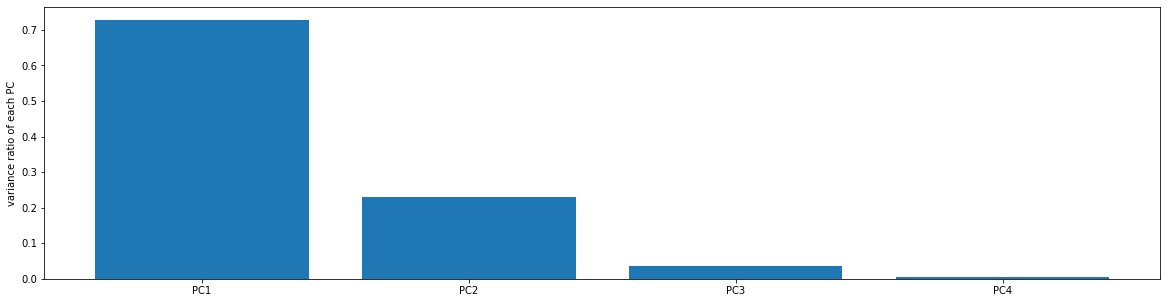

In [15]:
# visualize the explained variance ratio
fig2 = plt.figure(figsize=(20,5))
plt.bar([1,2,3,4], var_ratio)
plt.xticks([1,2,3,4], ['PC1','PC2','PC3','PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

In [16]:
# PCA dimensionality reduction
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)

In [18]:
# print shape of X (after PCA)
print(X_pca.shape)

(150, 2)


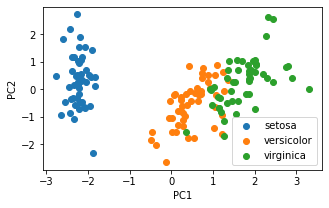

In [19]:
# visualize PCA result
fig3 = plt.figure(figsize = (5, 3))

setosa = plt.scatter(X_pca[:,0][y==0], X_pca[:,1][y==0])
versicolor = plt.scatter(X_pca[:,0][y==1], X_pca[:,1][y==1])
virginica = plt.scatter(X_pca[:,0][y==2], X_pca[:,1][y==2])

plt.legend((setosa,versicolor,virginica), ('setosa','versicolor','virginica'))

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [20]:
# set up KNN model 
knn = KNeighborsClassifier(n_neighbors = 3)

In [22]:
# train the model with PCA data
knn.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# make a prediction with training data
y_predict_pca = knn.predict(X_pca)
accuracy_pca = accuracy_score(y, y_predict_pca)
print(accuracy_pca)

0.9466666666666667
